In [10]:
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp 
from tinygp import kernels, GaussianProcess
import matplotlib.pyplot as plt

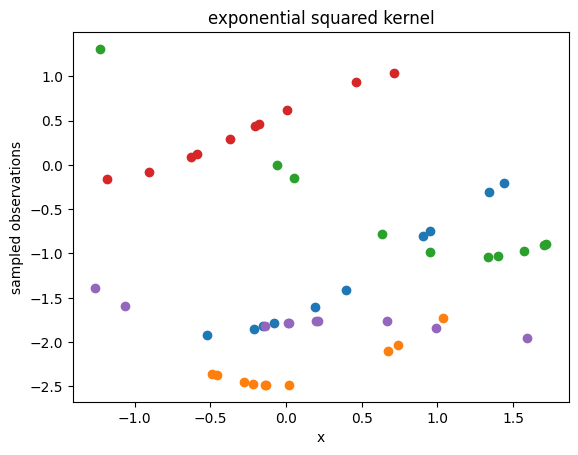

In [25]:
Xkernel = kernels.ExpSquared(scale=1.5)
Ykernel = kernels.ExpSquared(scale=1.5)
key = jax.random.PRNGKey(1)
for i in range(5):
    key, subkey1, subkey2 = jax.random.split(key, 3)
    gp_x = GaussianProcess(Xkernel, jnp.arange(10))
    x = gp_x.sample(subkey1)
    gp = GaussianProcess(Ykernel, x)
    y = gp.sample(subkey2)
    plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("sampled observations")
_ = plt.title("exponential squared kernel")
